### Hierarchical color schemes

This notebooks computes color schemes based on distances and a parent color that is used for the different color schemes of the hierarchical layout of the sound map visualizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
from skimage import io
from skimage.color import rgb2lab, deltaE_cie76

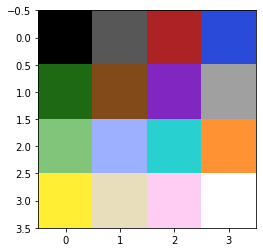

In [4]:
# 16 optimal palette taken from: http://alumni.media.mit.edu/~wad/color/palette.html
def optimalPalette():
    # RGB values of black, dark grey, red, blue, green, brown, purple, light grey, 
    # light green, light blue, cyan, orange, yellow, tan, pink, white
    return np.array([[0,0,0],
                    [87,87,87],
                    [173,35,35],
                    [42,75,215],
                    [29,105,20],
                    [129,74,25],
                    [129,38,192],
                    [160,160,160],
                    [129,197,122],
                    [157,175,255],
                    [41,208,208],
                    [255,146,51],
                    [255,238,51],
                    [233,222,187],
                    [255,205,243],
                    [255,255,255]])

num_classes = 50
opt_palette = optimalPalette()

indices = np.linspace((0,1,2,3),(12,13,14,15),4, dtype=int)
plt.imshow(opt_palette[indices])
plt.savefig('16colorpalette.png')

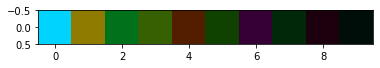

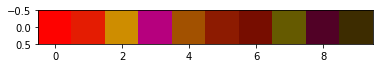

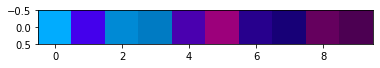

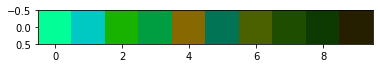

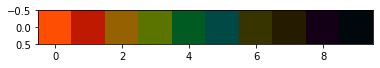

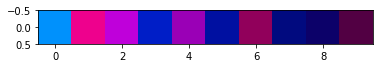

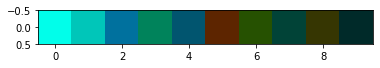

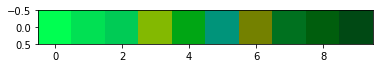

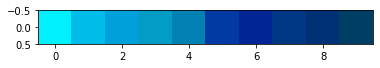

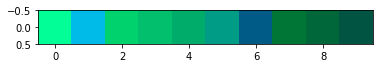

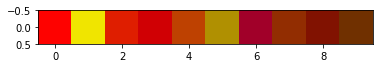

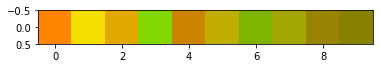

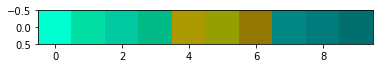

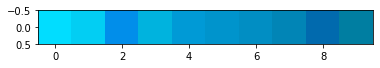

In [5]:
rgb = io.imread('https://i.stack.imgur.com/npnrv.png')

def getColorPalette(color, num_classes, rgb_img, threshold=100):
    lab      = rgb2lab(rgb_img)
    color_3d = np.uint8(np.asarray([[color]]))
    dE       = deltaE_cie76(rgb2lab(color_3d), lab)
    c_amount = len(rgb[dE < threshold])
    if c_amount == 0:
        return []
    chunks   = c_amount // num_classes
    palette  = np.array([rgb[dE < threshold][i * chunks] for i in range(num_classes)])
    return palette
   
def printColors(colors, name):
    if len(colors) != 0:
        indices = np.array([np.arange(len(colors))])
        plt.imshow(colors[indices])
        plt.savefig(name)
        plt.show()
    
for idx, c in enumerate(opt_palette[1:-1]):
    palette = getColorPalette(c, 10, rgb, 60)
    name = 'palette_' + str(idx) + '.png'
    printColors(palette, name)